# Маркетинговое исследование интернет-магазина. 

Необходимо:
<br>  
1) Приоритизировать гипотезы
<br>
2) Запустить A/B-тест
<br>
3) Проанализируйте результаты.

План работы:
<br>
### Часть 1. Предобработка данных.
<br>
Задачи:
<br>
1)Загрузка библиотек
<br>
2)Загрузка данных
<br>
3)Просмотреть данные на предмет соответствия форматов
<br>
4)Просмотреть данные на предмет наличия пропусков


### Часть 2. Приоритизация гипотез.
<br>
Задачи:
<br>
1)Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
<br>
2)Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
<br>
3)Необходимо указать, как изменилась приоритизация гипотез при применении RICE вместо ICE.
<br>

### Часть 3. Анализ A/B-теста.
<br>
Задачи:
<br>
Проанализируем A/B-тест:
<br>
1)Построим график кумулятивной выручки по группам.
<br>
2)Построим рафик кумулятивного среднего чека по группам.
<br>
3)Построим график относительного изменения кумулятивного среднего чека группы B к группе A.
<br>
4)Построим график кумулятивного среднего количества заказов на посетителя по группам.
<br>
5)Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
<br>
6)Построим точечный график количества заказов по пользователям.
<br>
7)Посчитем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.
<br>
8)Построим точечный график стоимостей заказов.
<br>
9)Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
<br>
10)Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
<br>
11)Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
<br>
12)Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
<br>
13)Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
<br>
14)Примем решение по результатам теста и объясним его. 
<br>
Варианты решений:
<br>
Остановить тест, зафиксировать победу одной из групп.
<br>
Остановить тест, зафиксировать отсутствие различий между группами.
<br>
Продолжить тест.

**Описание данных**


Файл /datasets/hypothesis.csv.
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv.
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.  

Файл /datasets/visitors.csv.  
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Предобработка данных.
Задачи:
<br>
1)Загрузка библиотек
<br>
2)Загрузка данных
<br>
3)Просмотреть данные на предмет соответствия форматов
<br>
4)Просмотреть данные на предмет наличия пропусков


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from scipy import stats as st
import datetime as dt

In [2]:
try:
    hypothesis = pd.read_csv(r'C:\Users\dimak\Downloads\hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    
try:
    orders = pd.read_csv(r'C:\Users\dimak\Downloads\orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
    
try:
    visitors = pd.read_csv(r'C:\Users\dimak\Downloads\visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Приводим название столбцов к нижнему регистру

In [4]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [5]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [6]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Столбец date приводим к формату datetime

In [9]:
orders['date'] = pd.to_datetime(orders['date'])

In [10]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [11]:
orders.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [13]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Столбец date приводим к формату datetime

In [16]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим наличие айди, которые попали в обе группы <a id='проверка'></a>

In [18]:
check = orders.loc[orders["group"]=="A", "visitor_id"].isin(orders.loc[orders["group"]=="B", "visitor_id"]).reset_index()

In [19]:
check2 = orders.loc[orders["group"]=="B", "visitor_id"].isin(orders.loc[orders["group"]=="A", "visitor_id"]).reset_index()

In [20]:
check

,index,visitor_id
0,2,True
1,7,False
2,8,False
3,10,False
4,12,False
...,...,...
552,1187,False
553,1188,False
554,1193,False
555,1194,False


In [21]:
check[check['visitor_id'] == True]

,index,visitor_id
0,2,True
9,26,True
10,29,True
11,33,True
13,41,True
...,...,...
542,1167,True
545,1173,True
547,1178,True
550,1183,True


In [22]:
check2[check2['visitor_id'] == True]

,index,visitor_id
12,20,True
15,23,True
16,24,True
17,27,True
21,32,True
...,...,...
627,1172,True
628,1175,True
632,1182,True
633,1184,True


In [23]:
ff = orders.loc[orders["group"]=="A", "visitor_id"].isin(orders.loc[orders["group"]=="B", "visitor_id"])

In [24]:
gg = orders.loc[orders["group"]=="B", "visitor_id"].isin(orders.loc[orders["group"]=="A", "visitor_id"])

In [25]:
orders = orders.drop(ff[ff].index)

In [26]:
orders = orders.drop(gg[gg].index)

In [27]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


В результате проверки обнаружилось 181 записей с айди, которые были в двух группах. Эти записи были удалены, чтобы они не влияли на результат эксперемента.

## Вывод по Части 1:
- привели столбцы к необходимому формату
- перевели название столбцов к нижнему регистру
- провел проверку записей в датафрейме "orders" на предмет того, что есть айди, которые попали в две группы. Эти записи были найдены и удалены, чтобы они не влияли на результат эксперемента.

# Часть 2. Приоритизация гипотез.

Задачи:
<br>
1)Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
<br>
2)Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
<br>
3)Необходимо указать, как изменилась приоритизация гипотез при применении RICE вместо ICE.

In [28]:
hypothesis['ICE'] = ( hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Гипотеза под номером 8 имеет наибольший ICE, также под номером 0 и 7 являются приоритетными.

In [29]:
hypothesis['RICE'] = (hypothesis['reach'] *  hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


По расчету RICE на первое место вышла гипотеза под номером 7, а следом за ней гипотеза под номером 2.

In [30]:
print(hypothesis[['hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis        ICE   RICE
7  Добавить форму подписки на все основные страни...  11.200000  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000   56.0
0  Добавить два новых канала привлечения трафика,...  13.333333   40.0
6  Показать на главной странице баннеры с актуаль...   8.000000   40.0
8  Запустить акцию, дающую скидку на товар в день...  16.200000   16.2
3  Изменить структура категорий, что увеличит кон...   1.125000    9.0
1  Запустить собственную службу доставки, что сок...   2.000000    4.0
5  Добавить страницу отзывов клиентов о магазине,...   1.333333    4.0
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000    3.0


## Вывод по Части 2:
По ICE приоритетные гипотезы: 8,0,7 , а по RICE 7, 2, 0. Это связано с тем, что параметр  reach гипотезы под номером 7 равен 10, однако у остальных гипотез он меньше, у 8-й которая выше по ICE параметр reach вообще равен 1. Помимо веса гипотезы нужно учитывать количество пользователей, которых она затронет. 

# Часть 3. Анализ A/B-теста
<br>
Задачи:
<br>
Проанализируем A/B-тест:
<br>
1)Построим график кумулятивной выручки по группам.
<br>
2)Построим рафик кумулятивного среднего чека по группам.
<br>
3)Построим график относительного изменения кумулятивного среднего чека группы B к группе A.
<br>
4)Построим график кумулятивного среднего количества заказов на посетителя по группам.
<br>
5)Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
<br>
6)Построим точечный график количества заказов по пользователям.
<br>
7)Посчитем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.
<br>
8)Построим точечный график стоимостей заказов.
<br>
9)Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
<br>
10)Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
<br>
11)Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
<br>
12)Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
<br>
13)Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
<br>
14)Примим решение по результатам теста и объясним его. 
<br>
Варианты решений:
<br>
Остановить тест, зафиксировать победу одной из групп.
<br>
Остановить тест, зафиксировать отсутствие различий между группами.
<br>
Продолжить тест.

#### Построим график кумулятивной выручки по группам.   


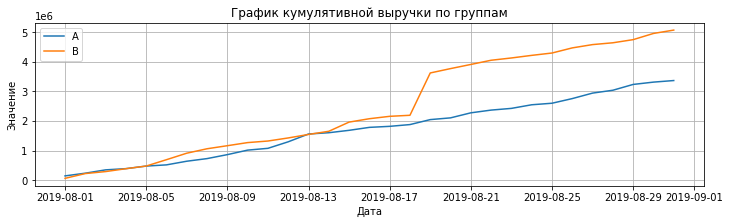

In [31]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]


cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 3))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid()
plt.legend()
plt.show()

Начиная примерно с 18 августа выручка по группе В начала расти, хотя до этой даты выручка была примерно в одном диапазоне у обеих групп. Это может быть связано с аномально крупными покупками.

#### Построим график кумулятивного среднего чека по группам.

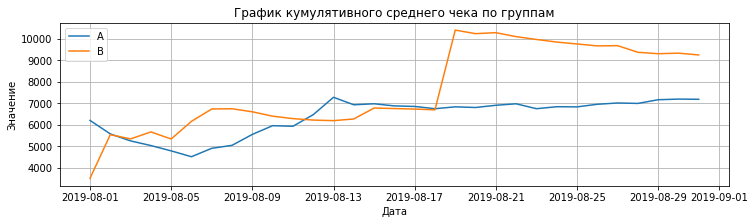

In [32]:
plt.figure(figsize=(12, 3))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid()
plt.legend() 

Кумулятивный средний чек по группам показывает похожу тенеденцию как и график кумулятивной выручки,однако тут можно заметить что средний чек группы А в период с 11 по 15 августа был выше чем у группы В, тем не менее в целом он меньше чем у группы В. Тем временем у группы В наблюдается такой же резкий рост 19 августа с дальнейшей тенденцией на снижение, в то время как у группы А средний чек стабилизируется после 13 августа. Предположение такое же как и в предыдущем пункте: это может быть связано с ростом суммы заказов.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

No handles with labels found to put in legend.


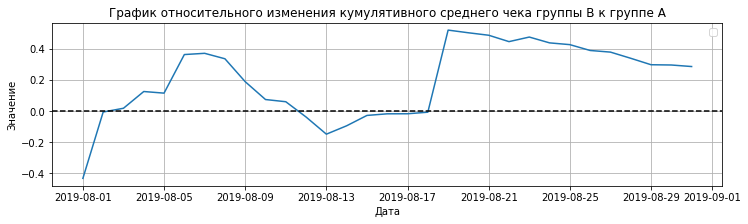

In [33]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 3))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid()
plt.legend() 

График относительного изменения кумулятивного среднего чека группы B к группе A больше походит на график кумулятивного среднего чека группы В, так как виден резкий скачек 19 августа. В целом видны скачки так же 5, 8, 13, 19 августа, видимо в эти даты были аномальные выбросы.

### Построим график кумулятивной конверсии по группам.   
Сделаем выводы и предположения.

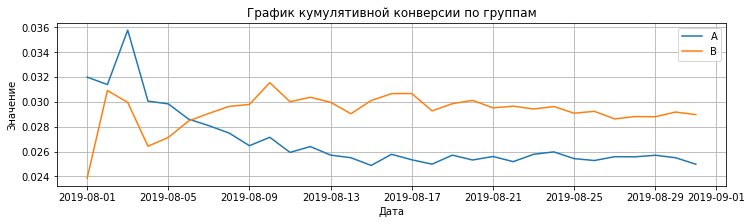

In [34]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12, 3))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid()
plt.legend() 

В начале эксперемента группа А опережала группу В по конверсии, однико уже с 6 августа группа А начала снижение, а группа В начала рост, с дальнейшей стабилизацией после 18 августа, так же чуть раньше стабилизирвоалась группа А. Однако мы все равно видим выбросы 2,3,4,10,18 августа по обеим группам. Мы можем предположить, что это выбросы, так как эти значения не встраиваются в общую динамику, но определить является ли это действительно выбросами мы можем продолжая исследование.

#### Построим график относительного изменения кумулятивной конверсии группы B к группе A.  


No handles with labels found to put in legend.


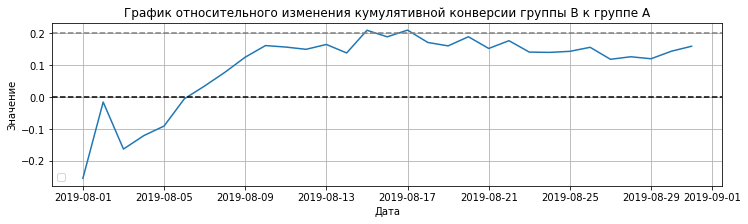

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 3))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid()
plt.legend() 


Группа В выходит вперед примерно на 6 день эксперемента до конца теста с пиком примерно 15 августа с дальнейшим незначительным падением.

#### Построим точечный график количества заказов по пользователям.   
Сначала построим гистограмму распределения числа заказов по пользователям

     visitor_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


(array([937.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,   7.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

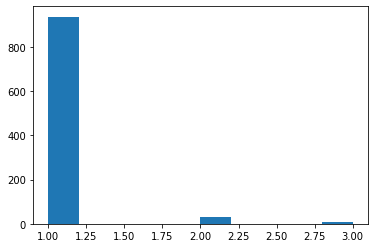

In [36]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
plt.hist(ordersByUsers['orders']) 

Теперь построим точечный график количества заказов по пользователям

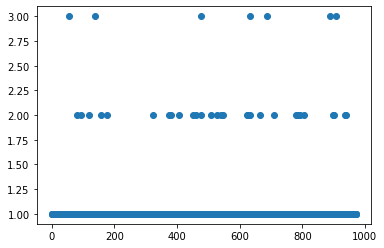

In [37]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

x_values = pd.Series(range(0, len(ordersByUsers)))

На двух графиках четко видно, что наибольшая часть пользователей сделала всего 1 заказ, в несколько раз реже пользователи делали 2 заказа, так что можно считать, что пользователи сделавшие более двух заказов это выбросы.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.  


In [38]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

print(np.percentile(ordersByUsers['orders'], [95, 99])) 

     visitor_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2
[1. 2.]


Больше 1 заказа совершают всего 5 процентов пользователей, а больше 2 всего 1 процент.

#### Построим точечный график стоимостей заказов.   

Сначала построим гистограмму распределения стоимости заказов

(array([1.014e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+01, 1.294950e+05, 2.589400e+05, 3.883850e+05,
        5.178300e+05, 6.472750e+05, 7.767200e+05, 9.061650e+05,
        1.035610e+06, 1.165055e+06, 1.294500e+06]),
 <BarContainer object of 10 artists>)

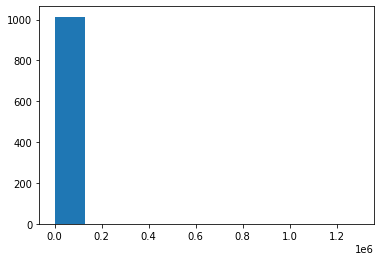

In [39]:
plt.hist(orders['revenue']) 

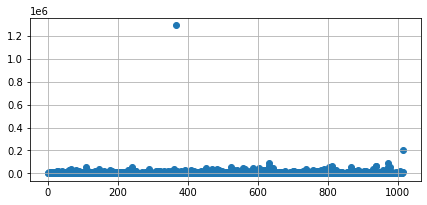

In [40]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(7, 3))
plt.scatter(x_values, orders['revenue']) 
plt.grid()
plt.show()

График выдал 2 аномальный значения, 1 заказ на сумму более 1.2 миллиона, который скорее всего и повлиял на динамику группы В. 

#### Посчитаем 95-й и 99-й перцентили стоимости заказов.  

In [41]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Заказы выше 26785 составляют не более 5% от всех заказов, в больше 53904 не более 1%
За верхнюю границу  аномальных заказов примем значение 53904.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [42]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


<a id='тут'></a>

Для проверки гипотезы будем использовать тест Уилкоксона-Манна-Уитни.

Применим критерий p-value. 

Примем для себя уровень значимости alpha = .05

За нулевую гипотезу примем следующее: статистически значимых различий в конверсиях между группами нет.
Тогда альтернативная гипотеза будет означать, что статистически значимые различия есть.


In [43]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("P-value:", "{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительные различия:", "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

P-value: 0.01102
Относительные различия: 0.160


Отвергаем нулевую гипотезу так как P-value < 0.05. Исходя из данных, можно сделать вывод о том, что в среднем количестве заказов в группах есть статистически значимые различия. Относительные различия 16% в пользу группы В.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

За нулевую гипотезу примем следующее: cредние чеки групп A и B равны, статистически значимых отличий нет. Тогда альтернативная гипотеза будет означать, что cредние чеки групп A и B различны, статистически значимые отличия есть.

In [44]:
print('P-value:','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.829
Относительные различия: 0.287


Не можем отвергнуть нулевую гипотезу так как P-value > 0.05. Исходя из данных, можно сделать вывод о том, что в среднем чеке в группах нету статистически значимых различий. Относительные различия 28,7% в пользу группы В.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.


Помним, что 95-й и 99-й перцентили средних чеков равны 26785 и 53904, а 95-й и 99-й перцентили числа заказов на одного пользователя равны 1 и 2.

Примем за аномалию тех юзеров, которые потратили более 26785, либо совершили 3 и более заказов.

In [45]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value:','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.012
Относительные различия: 0.182


Очищенные данные показывают ту же картину, что и сырые:  статистические значимые различия есть. Относительные различия не более 18,2%

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.  

In [46]:
print("P-value:",
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительные различия:",
   "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean() - 1
        
    )
) 


P-value: 0.646
Относительные различия: -0.048


P-value выросло до 0.646, а относительные различия снизились до 4,8%. В результате очистки в данных стало гораздо меньше аномалий. Хотя средний чек понизился у группы В по отношению к группе А до 4,8%, не смотря на то, что в сырых данных он был больше аж на 16%, что говорит о большом количестве  выбросов в сырых данных. 

### Примем решение по результатам теста и объясним его. 

По ICE приоритетные гипотезы: 8,0,7 , а по RICE 7, 2, 0. Это связано с тем, что параметр reach гипотезы под номером 7 равен 10, однако у остальных гипотез он меньше, у 8-й которая выше по ICE параметр reach вообще равен 1.

По результатам проведенного А\B  теста можно четко сказать, что группа В показала более хороший результат  в среднем количестве заказов на посетителя между группами по «сырым» данным(16% относительно группы В), а также в среднем чеке заказа между группами по «сырым» данным (28,7% относительно группы А), и в среднем количестве заказов на посетителя между группами по «очищенным» данным(18,8% относительно группы В), однако в показателе различий в среднем чеке заказа между группами по «очищенным» данным группа В теряет 4.8% относительно группы А. 

Тем не менее на основании вышеперечисленного можно сделать вывод что стоит остановить тест, так как группа B превосходит группу А по трем показателям из четырех.

Стоит дать рекомендацию отделу маркетинга по повышению среднего чека среди покупателей. 